In [1]:
library(tidyverse)
library(scales)
setwd("/home/embryous/Desktop/Graficos e Dados/Dados coronabr e estimativas do Coronavírus no Brasil")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



In [2]:
#Importa os dados do coronabr salvos para a análise
dados<- read_csv2("dados.csv")

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  date = col_date(format = ""),
  state = col_character(),
  city = col_logical(),
  place_type = col_character(),
  confirmed = col_double(),
  deaths = col_double(),
  is_last = col_logical(),
  estimated_population_2019 = col_double(),
  city_ibge_code = col_double(),
  confirmed_per_100k_inhabitants = col_double(),
  death_rate = col_double()
)


In [3]:
#Cria a base de dados com as estimativas e retira o último dia que ainda não foi totalmente contabilizado em relação a casos e mortes
dados_total <- dados%>%group_by(date)%>%
  summarize(confirmados =sum(confirmed), mortes = sum(deaths))%>%
  rename(dia=date)
dados_total<-dados_total%>%
  mutate(mortalidade = (mortes/confirmados)*100, estim_1=mortes/0.01, estim_06 = round(mortes/0.006),
         estim_085 = round(mortes/0.0085))
dados_total <- dados_total[-88,]

In [4]:
#Transforma a base de wide para long para fazer o gráfico
dados_longo_estimativa <- dados_total%>%
  select(c(dia, confirmados,estim_1, estim_06, estim_085))%>%
  gather( Estimativas , Casos, -dia)

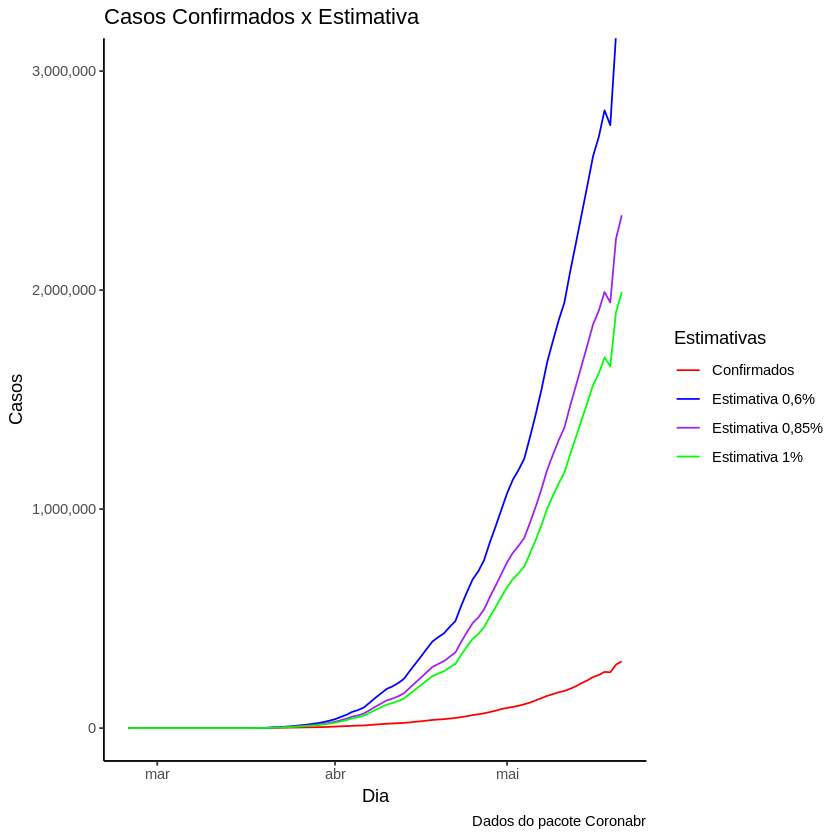

In [5]:
#Cria o gráfico de estimativas                                                      
ggplot(dados_longo_estimativa, aes(dia, Casos, color=Estimativas))+
  geom_line()+
  labs(y="Casos", x= "Dia", title= "Casos Confirmados x Estimativa", caption = "Dados do pacote Coronabr")+
  theme_classic()+
  coord_cartesian(ylim=c(0,3000000))+
  scale_y_continuous(labels = comma)+
  scale_color_manual(name = "Estimativas", labels = c("Confirmados", "Estimativa 0,6%", "Estimativa 0,85%", "Estimativa 1%"), values = c("Red", "Blue", "Purple","Green"))


In [6]:
#Usa os dados de estimativas para fazer as proporções de quantos casos estão sendo contabilizados em relação às estimativas
#Necessário filtrar as datas para quando os valores são maiores e retirar o último dia onde nem todos os casos e mortes forem contabilizados
casos_explicados <- dados_total%>%mutate(not1 = confirmados/estim_1, not2= confirmados/estim_085, not3=confirmados/estim_06)%>%
  select(dia, not1, not2, not3)%>%filter(dia>="2020-03-19")

In [7]:
#Transforma os dados de proporções de wide para long para o gráfico
dados_longo_explicados <- casos_explicados%>%
  gather( Estimativas , Porcentagem, -dia)

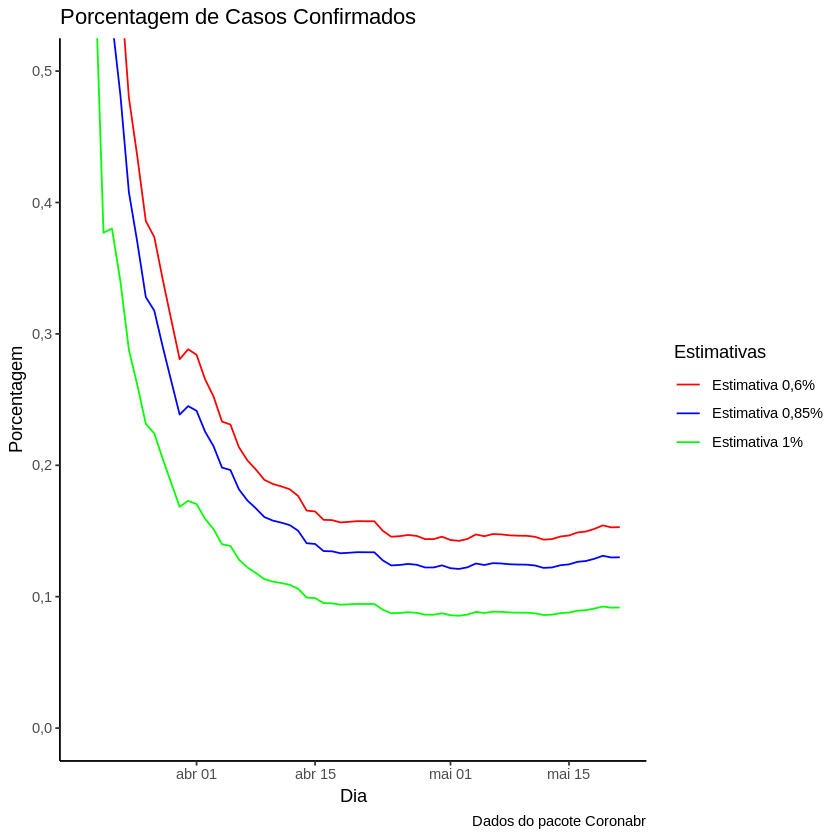

In [8]:
#Cria o gráfico com as propoções de casos contabilizados dadas as estimativas
ggplot(dados_longo_explicados, aes(dia, Porcentagem, color=Estimativas))+
  geom_line()+
  labs(y="Porcentagem", x= "Dia", title= "Porcentagem de Casos Confirmados", caption = "Dados do pacote Coronabr")+
  theme_classic()+
  coord_cartesian(ylim=c(0,0.5))+
  scale_color_manual(name = "Estimativas", labels = c("Estimativa 0,6%", "Estimativa 0,85%", "Estimativa 1%"), values = c("Red", "Blue", "Green"))



Foram necessárias algumas modificações no código para que fosse possível rodar no jupyter notebook. Entre elas o uso da função gather em vez da pivot_longer e como a instalação do pacote coronabr se mostrou complicada no Jupyter, preferi fazer a coleta de dados fora do jupyter.